# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [6]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [7]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [8]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)
print(project_data.shape)

(109248, 17)


In [9]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [10]:
#adding price of project to the project_data dataset
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)
print(price_data.shape)
print(price_data.columns.values)



(260115, 3)
['id' 'price' 'quantity']


In [11]:
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [12]:
project_data.shape

(109248, 19)

## 1.2 preprocessing of `project_subject_categories`

In [13]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [14]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [15]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [16]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  I have been fortunate enough to use the Fairy ...  
1  Imagine being 8-9 years old. You're in your th...

In [17]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [18]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [19]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [20]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [21]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [22]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [23]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [24]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:21<00:00, 1341.61it/s]


In [25]:
project_data['clean_essay'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                         clean_essay  
0  fortunate enough use fairy tale stem kits clas...  
1  imagine 8 9 years old third grade classroom se...

In [26]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [27]:
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_title= []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_title.append(sent.lower().strip())
    
    

100%|██████████| 109248/109248 [00:03<00:00, 29456.87it/s]


In [28]:
project_data['clean_title'] = preprocessed_title
project_data.drop(['project_title'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                         clean_essay  \
0  fortunate enough use fairy tale stem kits clas...   
1  imagine 8 9 years old third grade classroom se...   

                           clean_title  
0  engineering steam primary classroom  
1                  sensory tools focus

In [29]:
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_grade = []
# tqdm is for printing the status bar
for sent in tqdm(project_data['project_grade_category'].values):
    sent = sent.replace('-', '_')
    sent = sent.replace(' ', '_')
    
    
    preprocessed_grade.append(sent)
    
    

100%|██████████| 109248/109248 [00:00<00:00, 853493.50it/s]


In [30]:
project_data['clean_grades'] = preprocessed_grade
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date  \
0           CA 2016-04-27 00:27:36   
1           UT 2016-04-27 00:31:25   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                         clean_essay  \
0  fortunate enough use fairy tale stem kits clas...   
1  imagine 8 9 years old third grade classroom se...   

                           clean_title   clean_grades  
0  engineering steam primary classroom  Grades_PreK_2  
1                  sensory tools focus     Grades_3_5

In [31]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [32]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/namitagarwal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
#citation: https://www.programcreek.com/python/example/100005/nltk.sentiment.vader.SentimentIntensityAnalyzer

sentiments=[]
sid = SentimentIntensityAnalyzer()

for essay in project_data['clean_essay']:
    sentiment = sid.polarity_scores(essay)
        
    for k in sorted(sentiment):
        sentiments.append([sentiment['neg'], sentiment['pos'],
                           sentiment['neu'], sentiment['compound']])

In [34]:
sentiments

[[0.013, 0.214, 0.773, 0.9867],
 [0.013, 0.214, 0.773, 0.9867],
 [0.013, 0.214, 0.773, 0.9867],
 [0.013, 0.214, 0.773, 0.9867],
 [0.078, 0.272, 0.65, 0.9899],
 [0.078, 0.272, 0.65, 0.9899],
 [0.078, 0.272, 0.65, 0.9899],
 [0.078, 0.272, 0.65, 0.9899],
 [0.016, 0.278, 0.706, 0.9864],
 [0.016, 0.278, 0.706, 0.9864],
 [0.016, 0.278, 0.706, 0.9864],
 [0.016, 0.278, 0.706, 0.9864],
 [0.031, 0.194, 0.775, 0.9524],
 [0.031, 0.194, 0.775, 0.9524],
 [0.031, 0.194, 0.775, 0.9524],
 [0.031, 0.194, 0.775, 0.9524],
 [0.031, 0.315, 0.653, 0.9873],
 [0.031, 0.315, 0.653, 0.9873],
 [0.031, 0.315, 0.653, 0.9873],
 [0.031, 0.315, 0.653, 0.9873],
 [0.014, 0.295, 0.691, 0.9935],
 [0.014, 0.295, 0.691, 0.9935],
 [0.014, 0.295, 0.691, 0.9935],
 [0.014, 0.295, 0.691, 0.9935],
 [0.02, 0.426, 0.554, 0.9977],
 [0.02, 0.426, 0.554, 0.9977],
 [0.02, 0.426, 0.554, 0.9977],
 [0.02, 0.426, 0.554, 0.9977],
 [0.069, 0.31, 0.622, 0.9964],
 [0.069, 0.31, 0.622, 0.9964],
 [0.069, 0.31, 0.622, 0.9964],
 [0.069, 0.31, 0.62

In [35]:
#adding all the four sentiment scores to our dataframe
project_data[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(sentiments)

In [36]:
#finding #words in title
count=0
count_lst_title=[]
for word in preprocessed_title:
    count+=1
    count_lst_title.append(count)

project_data[['#words_in_title']] = pd.DataFrame(count_lst_title)

In [37]:
#finding #words in essay
count=0
count_lst_essay=[]
for word in preprocessed_essays:
    count+=1
    count_lst_essay.append(count)

project_data[['#words_in_essay']] = pd.DataFrame(count_lst_essay)

In [38]:
project_data

Unnamed: 0       id                        teacher_id teacher_prefix  \
0             8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1            37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
2            74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
3           100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
4            33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   
5           146723  p099708  c0a28c79fe8ad5810da49de47b3fb491           Mrs.   
6            95963  p155767  e50367a62524e11fbd2dc79651b6df21           Mrs.   
7           139722  p182545  22460c54072bd0cf958cc8349fac8b8f            Ms.   
8            72317  p087808  598621c141cda5fb184ee7e8ccdd3fcc            Ms.   
9           114684  p049177  679f50f18ce50aabcc602d17f7627206           Mrs.   
10           57854  p099430  4000cfe0c8b2df75a218347c1765e283            Ms.   
11          166022  p120079  8e22592f19b346df505bbdf6144c28d5            Mr.   
12           79341  p091436  bb2599c4a114d211b3381abe9f899bf8           Mrs.   
13          128817  p239087  11a60ddd63717c59fdd5a13ea92d34aa           Mrs.   
14          127145  p203619  85c61480f0eaea60734523665a3838b4           Mrs.   
15          104404  p258140  341dc52d3229176eda913da90b6c19c7           Mrs.   
16          149397  p131036  bf5bf59287e7c676a634a00284596b64           Mrs.   
17          179302  p199881  82ae813a6e2dc0da592de93861a69561           Mrs.   
18           50256  p203475  63e9a9f2c9811a247f1aa32ee6f92644           Mrs.   
19          139237  p147271  7f2072d18c67087af27066f60b2c9d85           Mrs.   
20          146737  p224791  ff5d658932d9ad0d9ebedabea582648e           Mrs.   
21           14427  p058390  578585b8ab7349189837e9618ca0f7f4           Mrs.   
22           59671  p061990  03093ad866c578b107d5be6957837c5f            Mr.   
23          148085  p196567  171f782b55614c56213131bcb8d44e06           Mrs.   
24           12619  p023504  18c82623ff01c59e593f7d81ab11e62c            Ms.   
25          121622  p138958  57626865698278199f753dc0f8e3ed00            Ms.   
26          135897  p092089  44ab4df75ae4e8b9bb23b818a7a1b1a4           Mrs.   
27          123970  p136762  362f046c8551fa0b2515f99d6e3ce6ea            Mr.   
28          165036  p042345  3c2efbcac105fc8a55df610ed03f4e77           Mrs.   
29          164738  p248458  40da977f63fb3d85589a063471304b11            Ms.   
...            ...      ...                               ...            ...   
109218       73173  p011863  e9a57ff541d9965373d9f05baec6dbb9           Mrs.   
109219       63258  p185518  783c9da904d2902781a4205a8a6f2cf2            Ms.   
109220      110157  p093760  7c0bb16f949a62e91151789662b27675           Mrs.   
109221      180842  p113135  ea758136dee04fab896aac935276161d           Mrs.   
109222       94252  p095511  d0b4f2709a391b3953bca7e4d0655992            Ms.   
109223       67820  p117003  a22232bad54f69e12f379fe86f3f8828            Ms.   
109224       84481  p140704  e36637824051b8a2edc16c6ec0eb4832            Mr.   
109225       28930  p079867  6240693c06f02e3bb63e89afa413f379            Mr.   
109226      180481  p036737  b2f85df8fe445189b1e56d7b6561adbe           Mrs.   
109227      169090  p162286  68c376fb8289fafb9831d0c886669fd1            Ms.   
109228       28565  p215499  194004c4aee808bcd24deff39b3acdb8            Ms.   
109229       71940  p038577  e8e0311f1765ef3a427a0c4da811a5fe            Ms.   
109230      150872  p149431  f308097ab4af3a20ad3d96b13083b9c4            Ms.   
109231       20564  p021779  504e698d91890380ff7e278e3918bb2f            Mr.   
109232      180953  p075974  3654cb255584baee31fded55e9fa593b           Mrs.   
109233       61360  p007550  05677e17e14429f6942245da50bd3da4           Mrs.   
109234       60690  p243246  1c6ad7948ab442bad6f72fd8ad64dd7f           Mrs.   
109235        3550  p215525  f09efb73f135c77ed938ca4df6a33ff5            Ms.   
109236  

In [39]:
project_data.shape

(109248, 26)

## 1.5 Preparing data for models

In [40]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'clean_essay', 'clean_title', 'clean_grades', 'neg', 'pos', 'neu',
       'compound', '#words_in_title', '#words_in_essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

<h1> Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [41]:
#setting the order of the columns 
project_data= project_data[['id','teacher_id','teacher_prefix','school_state','Date','clean_grades','clean_categories','clean_subcategories','clean_title','project_essay_1','project_essay_2','project_essay_3','project_essay_4','project_resource_summary','teacher_number_of_previously_posted_projects','price','quantity','clean_essay','neg', 'pos', 'neu', 'compound', '#words_in_title',
       '#words_in_essay','project_is_approved']]

In [42]:
project_data.shape

(109248, 25)

In [43]:
#splitting the dataset into the source variables (independant variables) and the target variable (dependant variable)
# considering 50k points due to memory issues

Y=np.array(project_data.iloc[:50000, 24])#.reshape(-1,1) #stores 'project is approved' column
X=project_data.iloc[:50000, 0:24] 



In [44]:
print(X.shape)
print(Y.shape)



(50000, 24)
(50000,)


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [46]:
#splitting dataset(70-30) into 2 parts - 'part1' and test set. 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25,  random_state = 0,stratify =Y)

In [47]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)


(37500, 24)
(37500,)
(12500, 24)
(12500,)


In [48]:
x_train.head(2)

id                        teacher_id teacher_prefix school_state  \
31243  p037248  1de6905c83525108f6cd810b8b24ff44            Ms.           TX   
46394  p207905  f748c6580ea683385ee9899b86e2a1f8            Ms.           TN   

                     Date   clean_grades clean_categories  \
31243 2016-08-17 01:44:42  Grades_PreK_2     Math_Science   
46394 2016-09-09 18:30:11     Grades_3_5    Health_Sports   

                        clean_subcategories                   clean_title  \
31243  AppliedSciences EnvironmentalScience  pre k stem science materials   
46394                       Health_Wellness      need wobble way wellness   

                                         project_essay_1       ...         \
31243  I work with children that all live below pover...       ...          
46394  I teach at a high poverty school in Memphis. M...       ...          

      teacher_number_of_previously_posted_projects   price quantity  \
31243                                            0  484.97        4   
46394                                           10  126.99       13   

                                             clean_essay    neg    pos    neu  \
31243  work children live poverty level rough neighbo...  0.070  0.214  0.716   
46394  teach high poverty school memphis students hig...  0.039  0.262  0.698   

      compound  #words_in_title  #words_in_essay  
31243   0.9922            31244            31244  
46394   0.9792            46395            46395  

[2 rows x 24 columns]

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [81]:
feature_list_bow = []
feature_list_tfidf = []

In [82]:
#####vectorising categorical features

# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot_train = vectorizer.transform(x_train['clean_categories'].values)
categories_one_hot_test = vectorizer.transform(x_test['clean_categories'].values)

print("Shape of matrix after one hot encodig ",categories_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",categories_one_hot_test.shape)

feature_list_bow.extend(vectorizer.get_feature_names())
feature_list_tfidf.extend(vectorizer.get_feature_names())

['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
Shape of matrix after one hot encodig  (37500, 9)
Shape of matrix after one hot encodig  (12500, 9)


In [83]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_subcategories'].values)
print(vectorizer.get_feature_names())

sub_categories_one_hot_train = vectorizer.transform(x_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer.transform(x_test['clean_subcategories'].values)

print("Shape of matrix after one hot encodig ",categories_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",categories_one_hot_test.shape)

feature_list_bow.extend(vectorizer.get_feature_names())
feature_list_tfidf.extend(vectorizer.get_feature_names())

['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
Shape of matrix after one hot encodig  (37500, 9)
Shape of matrix after one hot encodig  (12500, 9)


In [84]:
#school state
vectorizer = CountVectorizer()
vectorizer.fit(x_train['school_state'])
print(vectorizer.get_feature_names())


school_one_hot_train = vectorizer.transform(x_train['school_state'].values)
school_one_hot_test = vectorizer.transform(x_test['school_state'].values)


print("Shape of matrix after one hot encodig ",school_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",school_one_hot_test.shape)

feature_list_bow.extend(vectorizer.get_feature_names())
feature_list_tfidf.extend(vectorizer.get_feature_names())

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Shape of matrix after one hot encodig  (37500, 51)
Shape of matrix after one hot encodig  (12500, 51)


In [85]:
#teacher_prefix 
vectorizer = CountVectorizer()
vectorizer.fit(x_train['teacher_prefix'].dropna().values)
print(vectorizer.get_feature_names())


teacher_prefix_one_hot_train = vectorizer.transform(x_train['teacher_prefix'].dropna().values)
teacher_prefix_one_hot_test = vectorizer.transform(x_test['teacher_prefix'].dropna().values)

print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_test.shape)

feature_list_bow.extend(vectorizer.get_feature_names())
feature_list_tfidf.extend(vectorizer.get_feature_names())

['dr', 'mr', 'mrs', 'ms', 'teacher']
Shape of matrix after one hot encodig  (37499, 5)
Shape of matrix after one hot encodig  (12499, 5)


In [86]:
#project_grade_category 
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_grades'].values)
print(vectorizer.get_feature_names())


grade_one_hot_train = vectorizer.transform(x_train['clean_grades'].values)
grade_one_hot_test = vectorizer.transform(x_test['clean_grades'].values)


print("Shape of matrix after one hot encodig ",grade_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",grade_one_hot_test.shape)

feature_list_bow.extend(vectorizer.get_feature_names())
feature_list_tfidf.extend(vectorizer.get_feature_names())

['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
Shape of matrix after one hot encodig  (37500, 4)
Shape of matrix after one hot encodig  (12500, 4)


In [87]:
#vectorizing numerical features
#price

from sklearn.preprocessing import Normalizer

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = Normalizer()
price_scalar.fit(x_train['price'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(x_train['price'].values.reshape(1, -1)).reshape(-1,1)
price_standardized_test = price_scalar.transform(x_test['price'].values.reshape(1, -1)).reshape(-1,1)

print(price_standardized_train.shape)

feature_list_bow.append('price')
feature_list_tfidf.append('price')

(37500, 1)


In [88]:
#teacher_number_of_previously_posted_projects

teacher_scalar = Normalizer()
teacher_scalar.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1, -1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized_train = teacher_scalar.transform(x_train['price'].values.reshape(1, -1)).reshape(-1,1)
teacher_number_of_previously_posted_projects_standardized_test = teacher_scalar.transform(x_test['price'].values.reshape(1, -1)).reshape(-1,1)

print(teacher_number_of_previously_posted_projects_standardized_train.shape)

feature_list_bow.append('teacher_number_of_previously_posted_projects')
feature_list_tfidf.append('teacher_number_of_previously_posted_projects')

(37500, 1)


In [89]:
#quantity

quantity_scalar = Normalizer()
quantity_scalar.fit(x_train['quantity'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
quantity_train = quantity_scalar.transform(x_train['quantity'].values.reshape(1,-1)).reshape(-1,1)
quantity_test = quantity_scalar.transform(x_test['quantity'].values.reshape(1, -1)).reshape(-1,1)

feature_list_bow.append('quantity')
feature_list_tfidf.append('quantity')

In [90]:
#words_in_essay

essay_words_scalar = Normalizer()
essay_words_scalar.fit(x_train['#words_in_essay'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
essay_words_train = essay_words_scalar.transform(x_train['#words_in_essay'].values.reshape(1,-1)).reshape(-1,1)
essay_words_test = essay_words_scalar.transform(x_test['#words_in_essay'].values.reshape(1, -1)).reshape(-1,1)

feature_list_bow.append('#words_in_essay')
feature_list_tfidf.append('#words_in_essay')

In [91]:
#words_in_title

title_words_scalar = Normalizer()
title_words_scalar.fit(x_train['#words_in_title'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
title_words_train = title_words_scalar.transform(x_train['#words_in_title'].values.reshape(1, -1)).reshape(-1,1)
title_words_test = title_words_scalar.transform(x_test['#words_in_title'].values.reshape(1, -1)).reshape(-1,1)

feature_list_bow.append('#words_in_title')
feature_list_tfidf.append('#words_in_title')

In [92]:
#neg
scalar = Normalizer()
scalar.fit(x_train['neg'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
neg_train = scalar.transform(x_train['neg'].values.reshape(1,-1)).reshape(-1,1)
neg_test = scalar.transform(x_test['neg'].values.reshape(1, -1)).reshape(-1,1)

feature_list_bow.append('neg')
feature_list_tfidf.append('neg')

In [93]:
#pos
scalar = Normalizer()
scalar.fit(x_train['pos'].values.reshape(1, -1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
pos_train = scalar.transform(x_train['pos'].values.reshape(1, -1)).reshape(-1,1)
pos_test = scalar.transform(x_test['pos'].values.reshape(1, -1)).reshape(-1,1)

feature_list_bow.append('pos')
feature_list_tfidf.append('pos')

In [94]:
#neu
scalar = Normalizer()
scalar.fit(x_train['neu'].values.reshape(1, -1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
neu_train = scalar.transform(x_train['neu'].values.reshape(1, -1)).reshape(-1,1)
neu_test = scalar.transform(x_test['neu'].values.reshape(1, -1)).reshape(-1,1)

feature_list_bow.append('neu')
feature_list_tfidf.append('neu')

In [95]:
#compound
scalar = Normalizer()
scalar.fit(x_train['compound'].values.reshape(1, -1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
compound_train = scalar.transform(x_train['compound'].values.reshape(1, -1)).reshape(-1,1)
compound_test = scalar.transform(x_test['compound'].values.reshape(1, -1)).reshape(-1,1)

feature_list_bow.append('compound')
feature_list_tfidf.append('compound')

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [96]:
#BOW essay
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(x_train['clean_essay']) #fit

essay_bow_train = vectorizer.transform(x_train['clean_essay']) #transform
essay_bow_test = vectorizer.transform(x_test['clean_essay']) #transform


print("Shape of matrix after one hot encodig ",essay_bow_train.shape)
print("Shape of matrix after one hot encodig ",essay_bow_test.shape)

feature_list_bow.extend(vectorizer.get_feature_names())


Shape of matrix after one hot encodig  (37500, 5000)
Shape of matrix after one hot encodig  (12500, 5000)


In [97]:
#bow title
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(x_train['clean_title']) #fit

title_bow_train = vectorizer.transform(x_train['clean_title']) #transform
title_bow_test = vectorizer.transform(x_test['clean_title']) #transform


print("Shape of matrix after one hot encodig ",title_bow_train.shape)
print("Shape of matrix after one hot encodig ",title_bow_test.shape)

feature_list_bow.extend(vectorizer.get_feature_names())

Shape of matrix after one hot encodig  (37500, 1627)
Shape of matrix after one hot encodig  (12500, 1627)


In [98]:
#tf-idf essay
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(x_train['clean_essay']) #fit

essay_tfidf_train = vectorizer.transform(x_train['clean_essay']) #transform
essay_tfidf_test = vectorizer.transform(x_test['clean_essay']) #transform


print("Shape of matrix after one hot encodig ",essay_tfidf_train.shape)
print("Shape of matrix after one hot encodig ",essay_tfidf_test.shape)

feature_list_tfidf.extend(vectorizer.get_feature_names())



Shape of matrix after one hot encodig  (37500, 5000)
Shape of matrix after one hot encodig  (12500, 5000)


In [99]:
#tfidf title 

vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(x_train['clean_title']) #fit

title_tfidf_train = vectorizer.transform(x_train['clean_title']) #transform
title_tfidf_test = vectorizer.transform(x_test['clean_title']) #transform


print("Shape of matrix after one hot encodig ",title_tfidf_train.shape)
print("Shape of matrix after one hot encodig ",title_tfidf_test.shape)

feature_list_tfidf.extend(vectorizer.get_feature_names())

Shape of matrix after one hot encodig  (37500, 1627)
Shape of matrix after one hot encodig  (12500, 1627)


In [68]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [69]:
# average Word2Vec for train(essay)
# compute average word2vec for each review.
avg_w2v_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words #calculatig (w2v(word_i))/(number of words in that sentence)
    avg_w2v_vectors_essay_train.append(vector) #stores the w2v for all sentences/reviews in the entire dataset

print(len(avg_w2v_vectors_essay_train))
print(len(avg_w2v_vectors_essay_train[0]))

100%|██████████| 37500/37500 [00:15<00:00, 2469.51it/s]

37500
300


In [70]:
# average Word2Vec for test(essay)
# compute average word2vec for each review.
avg_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words #calculatig (w2v(word_i))/(number of words in that sentence)
    avg_w2v_vectors_essay_test.append(vector) #stores the w2v for all sentences/reviews in the entire dataset

print(len(avg_w2v_vectors_essay_test))
print(len(avg_w2v_vectors_essay_test[0]))

100%|██████████| 12500/12500 [00:05<00:00, 2482.58it/s]

12500
300


In [71]:
# average Word2Vec train(title)
# compute average word2vec for each review.
avg_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words #calculatig (w2v(word_i))/(number of words in that sentence)
    avg_w2v_vectors_title_train.append(vector) #stores the w2v for all sentences/reviews in the entire dataset

print(len(avg_w2v_vectors_title_train))
print(len(avg_w2v_vectors_title_train[0]))

100%|██████████| 37500/37500 [00:00<00:00, 39627.68it/s]

37500
300


In [72]:
# average Word2Vec test(title)
# compute average word2vec for each review.
avg_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words #calculatig (w2v(word_i))/(number of words in that sentence)
    avg_w2v_vectors_title_test.append(vector) #stores the w2v for all sentences/reviews in the entire dataset

print(len(avg_w2v_vectors_title_test))
print(len(avg_w2v_vectors_title_test[0]))

100%|██████████| 12500/12500 [00:00<00:00, 42151.67it/s]

12500
300


In [73]:
#tfidf-w2v ESSAY
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['clean_essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [74]:
# TRAIN
# compute average word2vec for each review.
tfidf_w2v_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_train.append(vector)

print(len(tfidf_w2v_vectors_essay_train))
print(len(tfidf_w2v_vectors_essay_train[0]))

100%|██████████| 37500/37500 [01:44<00:00, 359.66it/s]

37500
300


In [75]:
# TEST
# compute average word2vec for each review.
tfidf_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_test.append(vector)

print(len(tfidf_w2v_vectors_essay_test))
print(len(tfidf_w2v_vectors_essay_test[0]))

100%|██████████| 12500/12500 [00:32<00:00, 387.10it/s]

12500
300


In [76]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['clean_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [77]:
# tfidf Word2Vec train(title)
# compute tfidf word2vec for each review.
tfidf_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)

print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))

100%|██████████| 37500/37500 [00:02<00:00, 18315.05it/s]

37500
300


In [78]:
# tfidf Word2Vec test(title)
# compute tfidf word2vec for each review.
tfidf_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)

print(len(tfidf_w2v_vectors_title_test))
print(len(tfidf_w2v_vectors_title_test[0]))

100%|██████████| 12500/12500 [00:00<00:00, 18563.23it/s]

12500
300


In [100]:
##########TRAIN
print(categories_one_hot_train.shape)
print(sub_categories_one_hot_train.shape)
print(school_one_hot_train.shape)
print(teacher_prefix_one_hot_train.shape)
print(grade_one_hot_train.shape)

print(price_standardized_train.shape)
print(teacher_number_of_previously_posted_projects_standardized_train.shape)
print(quantity_train.shape)
print(neg_train.shape)
print(pos_train.shape)
print(neu_train.shape)
print(compound_train.shape)
print(essay_words_train.shape)
print(title_words_train.shape)


print(essay_bow_train.shape)
print(title_bow_train.shape)

print(essay_tfidf_train.shape)
print(title_tfidf_train.shape)

avg_w2v_vectors_essay_train = np.array(avg_w2v_vectors_essay_train)
avg_w2v_vectors_title_train = np.array(avg_w2v_vectors_title_train)

print(avg_w2v_vectors_essay_train.shape)
print(avg_w2v_vectors_title_train.shape)

tfidf_w2v_vectors_title_train = np.array(tfidf_w2v_vectors_title_train)
tfidf_w2v_vectors_essay_train = np.array(tfidf_w2v_vectors_essay_train)

print(tfidf_w2v_vectors_title_train.shape)
print(tfidf_w2v_vectors_essay_train.shape)

(37500, 9)
(37500, 30)
(37500, 51)
(37499, 5)
(37500, 4)
(37500, 1)
(37500, 1)
(37500, 1)
(37500, 1)
(37500, 1)
(37500, 1)
(37500, 1)
(37500, 1)
(37500, 1)
(37500, 5000)
(37500, 1627)
(37500, 5000)
(37500, 1627)
(37500, 300)
(37500, 300)
(37500, 300)
(37500, 300)


In [101]:
######TEST
print(categories_one_hot_test.shape)
print(sub_categories_one_hot_test.shape)  
print(school_one_hot_test.shape)
print(teacher_prefix_one_hot_test.shape)  
print(grade_one_hot_test.shape)

print(price_standardized_test.shape)
print(teacher_number_of_previously_posted_projects_standardized_test.shape)
print(quantity_test.shape)
print(neg_test.shape)
print(pos_test.shape)
print(neu_test.shape)
print(compound_test.shape)
print(essay_words_test.shape)
print(title_words_test.shape)


print(essay_bow_test.shape)
print(title_bow_test.shape)

print(essay_tfidf_test.shape)
print(title_tfidf_test.shape)  

avg_w2v_vectors_essay_test = np.array(avg_w2v_vectors_essay_test)
avg_w2v_vectors_title_test = np.array(avg_w2v_vectors_title_test)

print(avg_w2v_vectors_essay_test.shape)
print(avg_w2v_vectors_title_test.shape)

tfidf_w2v_vectors_title_test = np.array(tfidf_w2v_vectors_title_test)
tfidf_w2v_vectors_essay_test = np.array(tfidf_w2v_vectors_essay_test)

print(tfidf_w2v_vectors_title_test.shape)
print(tfidf_w2v_vectors_essay_test.shape)

(12500, 9)
(12500, 30)
(12500, 51)
(12499, 5)
(12500, 4)
(12500, 1)
(12500, 1)
(12500, 1)
(12500, 1)
(12500, 1)
(12500, 1)
(12500, 1)
(12500, 1)
(12500, 1)
(12500, 5000)
(12500, 1627)
(12500, 5000)
(12500, 1627)
(12500, 300)
(12500, 300)
(12500, 300)
(12500, 300)


<h2>2.4 Appling DT on different kind of featurization as mentioned in the instructions</h2>

<br>Apply DT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [102]:
#taking 5k points to proceed
##########TRAIN
categories_one_hot_train= categories_one_hot_train[:37499, :]
sub_categories_one_hot_train = sub_categories_one_hot_train[:37499, :]
school_one_hot_train = school_one_hot_train[:37499, :]
teacher_prefix_one_hot_train = teacher_prefix_one_hot_train[:37499, :]
grade_one_hot_train = grade_one_hot_train[:37499, :]

price_standardized_train = price_standardized_train[:37499, :]
teacher_number_of_previously_posted_projects_standardized_train= teacher_number_of_previously_posted_projects_standardized_train[:37499, :]
quantity_train =quantity_train[:37499, :]
neg_train =neg_train[:37499, :]
pos_train =pos_train[:37499, :]
neu_train =neu_train[:37499, :]
compound_train = compound_train[:37499, :]
essay_words_train = essay_words_train[:37499, :]
title_words_train =title_words_train[:37499, :]

essay_bow_train = essay_bow_train[:37499, :]
title_bow_train = title_bow_train[:37499, :]

essay_tfidf_train = essay_tfidf_train[:37499, :]
title_tfidf_train = title_tfidf_train[:37499, :]

avg_w2v_vectors_essay_train = np.array(avg_w2v_vectors_essay_train)[:37499, :]
avg_w2v_vectors_title_train = np.array(avg_w2v_vectors_title_train)[:37499, :]

tfidf_w2v_vectors_title_train = np.array(tfidf_w2v_vectors_title_train)[:37499, :]
tfidf_w2v_vectors_essay_train = np.array(tfidf_w2v_vectors_essay_train)[:37499, :]


######TEST
categories_one_hot_test= categories_one_hot_test[:12499, :]
sub_categories_one_hot_test = sub_categories_one_hot_test[:12499, :]
school_one_hot_test = school_one_hot_test[:12499, :]
teacher_prefix_one_hot_test = teacher_prefix_one_hot_test[:12499, :]
grade_one_hot_test = grade_one_hot_test[:12499, :]

price_standardized_test = price_standardized_test[:12499, :]
teacher_number_of_previously_posted_projects_standardized_test = teacher_number_of_previously_posted_projects_standardized_test[:12499, :]
quantity_test = quantity_test[:12499, :]
neg_test = neg_test[:12499, :]
pos_test =pos_test[:12499, :]
neu_test = neu_test[:12499, :]
compound_test = compound_test[:12499, :]
essay_words_test = essay_words_test[:12499, :]
title_words_test = title_words_test[:12499, :]


essay_bow_test = essay_bow_test[:12499, :]
title_bow_test = title_bow_test[:12499, :]

essay_tfidf_test = essay_tfidf_test[:12499, :]
title_tfidf_test = title_tfidf_test[:12499, :]

avg_w2v_vectors_essay_test = np.array(avg_w2v_vectors_essay_test)[:12499, :]
avg_w2v_vectors_title_test = np.array(avg_w2v_vectors_title_test)[:12499, :]

tfidf_w2v_vectors_title_test = np.array(tfidf_w2v_vectors_title_test)[:12499, :]
tfidf_w2v_vectors_essay_test = np.array(tfidf_w2v_vectors_essay_test)[:12499, :]

### 2.4.2 Applying DT brute force on BoW,<font color='red'> SET 1</font>

In [103]:
#preparing data
from scipy.sparse import hstack

In [104]:
#preparing data (on the basis of x_train dataset)

x1_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_one_hot_train,teacher_prefix_one_hot_train,grade_one_hot_train,price_standardized_train,teacher_number_of_previously_posted_projects_standardized_train,quantity_train,neg_train, pos_train,  neu_train, compound_train,essay_words_train,title_words_train , essay_bow_train, title_bow_train)) 
y1_train = y_train[:37499]

x1_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_one_hot_test,teacher_prefix_one_hot_test,grade_one_hot_test,price_standardized_test,teacher_number_of_previously_posted_projects_standardized_test,quantity_test,neg_test, pos_test,  neu_test, compound_test,essay_words_test,title_words_test, essay_bow_test, title_bow_test)) 
y1_test = y_test[:12499]

In [105]:
print(x1_train.shape)
print(y1_train.shape)

print(x1_test.shape)
print(y1_test.shape)


(37499, 6735)
(37499,)
(12499, 6735)
(12499,)


In [106]:
len(feature_list_bow)

6735

In [107]:
def predict_prob(clf, data):

    y_data_pred = []
    y_data_pred.extend(clf.predict_proba(data)[:,1])
    
    return y_data_pred

In [108]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [109]:
depth = [4,6, 8, 9,10,12,14,17]
min_sample_split = [2,10,20,30,40,50]
parameters = {'max_depth':[4,6, 8, 9,10,12,14,17] , 'min_samples_split': [2,10,20,30,40,50] }
neigh = tree.DecisionTreeClassifier()

model = GridSearchCV(neigh, parameters,scoring='roc_auc') 
model.fit(x1_train,y1_train)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 9, 10, 12, 14, 17],
                         'min_samples_split': [2, 10, 20, 30, 4

In [110]:
clf = model.best_estimator_

In [111]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [112]:
clf.classes_

array([0, 1])

In [113]:
#best hyperparamters- 
#max_depth= 8
#min_samples_split= 40

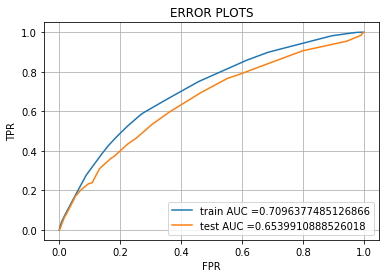

In [114]:
clf.fit(x1_train, y1_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = predict_prob(clf, x1_train.tocsc())    
y_test_pred = predict_prob(clf, x1_test.tocsc())

train_fpr, train_tpr, tr_thresholds = roc_curve(y1_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y1_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h1> visualizing the decision tree

In [115]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/Users/namitagarwal/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



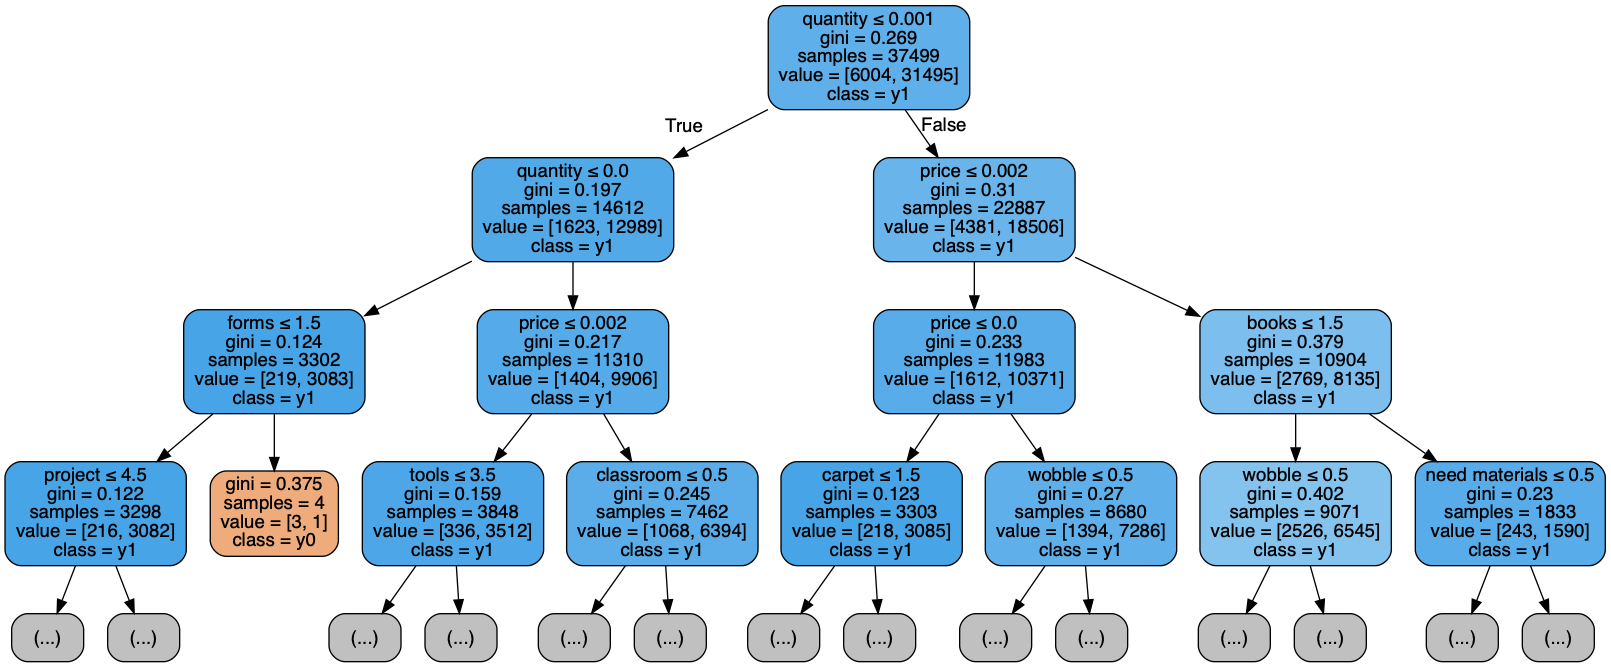

In [116]:
#CITATION: https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  max_depth =3,
                class_names = True,
                feature_names = feature_list_bow,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [117]:
model.cv_results_

{'mean_fit_time': array([0.89675697, 0.83488131, 0.82553999, 0.86090271, 0.82831732,
        0.95557555, 1.60820889, 1.5317653 , 1.46075924, 1.644732  ,
        1.49839878, 1.53954172, 2.61581008, 2.50853165, 2.3435777 ,
        2.35086505, 2.17037423, 2.16163262, 2.86734732, 2.75626723,
        2.67753426, 2.66663313, 2.69192004, 2.7714049 , 3.50839202,
        3.31718802, 3.21010121, 3.26996605, 3.20708855, 3.33070413,
        5.13644497, 4.83477108, 4.83186976, 4.84185108, 4.58457883,
        4.43432474, 6.39276711, 5.99617934, 5.70669063, 5.57059169,
        5.57164447, 5.51556619, 8.67700775, 8.125115  , 7.91694379,
        7.49286389, 7.60206087, 7.41066504]),
 'std_fit_time': array([0.02387679, 0.03204121, 0.02406401, 0.07439045, 0.01839126,
        0.07625892, 0.089634  , 0.0785985 , 0.0206621 , 0.02099422,
        0.03028242, 0.04777372, 0.12439826, 0.10509296, 0.07555568,
        0.20716093, 0.06537559, 0.05515658, 0.07202032, 0.08189893,
        0.08278504, 0.07040396, 0.069

In [118]:
pvt = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_min_samples_split', columns='param_max_depth')


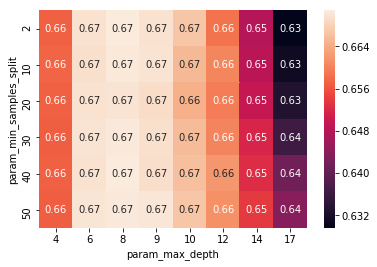

In [119]:
import seaborn as sns       
ax = sns.heatmap(pvt, annot= True )

In [120]:
# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [121]:
from sklearn.metrics import confusion_matrix

the maximum value of tpr*(1-fpr) 0.4287152217619857 for threshold 0.859
Train confusion matrix


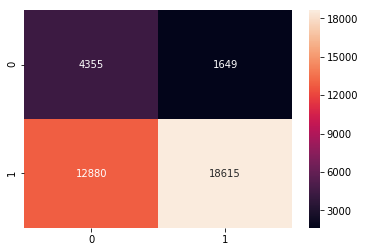

In [122]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Train confusion matrix")
conf_matrix_train = confusion_matrix(y1_train, predict_with_best_t(y_train_pred, best_t))
#plotting confusion matrix using seaborn
sns.heatmap(conf_matrix_train,fmt = 'd', annot=True)

Test confusion matrix


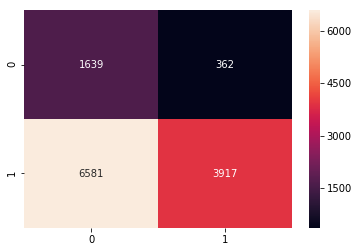

In [123]:
print("Test confusion matrix")
conf_matrix_test = confusion_matrix(y1_test, predict_with_best_t(y_test_pred, best_t))

sns.heatmap(conf_matrix_test,fmt = 'd', annot=True)

<h1>Word Cloud

In [124]:
conf_matrix_test[0][1]

362

In [129]:
x_ = x_test['clean_essay']
x_ = x_[:12499]
x_.shape

(12499,)

In [130]:
y1_test.shape

(12499,)

In [131]:
y1_pred = predict_with_best_t(y_test_pred, best_t) #list

#converting to array
y1_pred = np.array(y1_pred)
y1_pred.shape

(12499,)

In [132]:
df= pd.DataFrame(x_)
df['y_original']= y1_test #adding original y values
df['y_pred'] = y1_pred #adding predicted y values

In [133]:
print(df.shape)
df.head(2)

(12499, 3)


clean_essay  y_original  y_pred
2243   teach class 24 kindergarten students title 1 s...           1       1
26478  fourth grade students enter classroom knowing ...           1       0

In [134]:
false_positive_datapts = df[(df['y_original']==0) & (df['y_pred'] == 1)]
false_positive_datapts.head(2)

clean_essay  y_original  y_pred
26289  classroom inclusive co taught classroom school...           0       1
2741   end school year would like students reading gr...           0       1

In [135]:
false_positive_datapts.shape
#576 datapoints. That was the #datapoints we got as false postive

(362, 3)

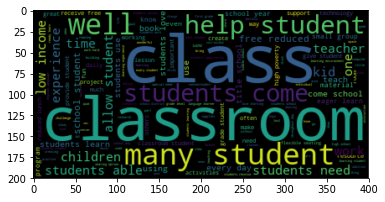

In [136]:
fp_data = "".join(essay for essay in df.clean_essay)

from wordcloud import WordCloud

w_cld = WordCloud().generate(fp_data)

plt.imshow(w_cld, interpolation = 'bilinear')
plt.show()

In [137]:
#x_price = x_test['price']
indices = []
for row in false_positive_datapts.index:
    indices.append(row)
#print(indices)
print(len(indices))
#indices ---- stores the indices of the points for which we have false positive

362


In [138]:
row_price = x_test.loc[indices]['price'] #extracting all the prices of the rows which gave false positive

Text(0.5, 1.0, 'box plot for price for false positive points')

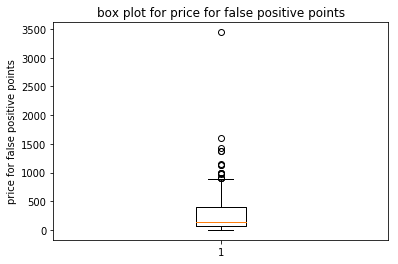

In [139]:
from matplotlib.pyplot import boxplot

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(row_price)
plt.ylabel("price for false positive points")
plt.title("box plot for price for false positive points")

In [140]:
row_previous_project = x_test.loc[indices]['teacher_number_of_previously_posted_projects']
row_previous_project.head(5)

26289     0
2741      0
45566     3
21003     0
8542     24
Name: teacher_number_of_previously_posted_projects, dtype: int64

Text(0.5, 1.0, 'pdf plot for teacher_number_of_previously_posted_projects for false positive points')

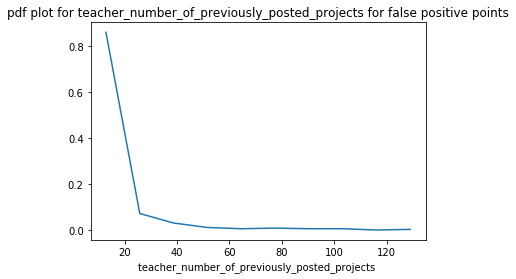

In [141]:
counts, bin_edges = np.histogram(row_previous_project)

pdf= counts/ sum(counts)
plt.plot(bin_edges[1:], pdf)
plt.xlabel("teacher_number_of_previously_posted_projects ")
plt.title("pdf plot for teacher_number_of_previously_posted_projects for false positive points")

### 2.4.2 Applying DT brute force on TFIDF,<font color='red'> SET 2</font>

In [142]:
#preparing data (on the basis of x_train dataset)

x2_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_one_hot_train,teacher_prefix_one_hot_train,grade_one_hot_train,price_standardized_train,teacher_number_of_previously_posted_projects_standardized_train,quantity_train,neg_train, pos_train,  neu_train, compound_train,essay_words_train,title_words_train , essay_tfidf_train, title_tfidf_train)) 
y2_train = y_train[:37499]

x2_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_one_hot_test,teacher_prefix_one_hot_test,grade_one_hot_test,price_standardized_test,teacher_number_of_previously_posted_projects_standardized_test,quantity_test,neg_test, pos_test,  neu_test, compound_test,essay_words_test,title_words_test, essay_tfidf_test, title_tfidf_test)) 
y2_test = y_test[:12499]

In [143]:
print(x2_train.shape)
print(y2_train.shape)

print(x2_test.shape)
print(y2_test.shape)

#to proceed with applying knn on bow, we've created the data 

(37499, 6735)
(37499,)
(12499, 6735)
(12499,)


In [144]:
len(feature_list_tfidf)

6735

In [145]:
depth = [4,6, 8, 9,10,12,14,17]
min_sample_split = [2,10,20,30,40,50]
parameters = {'max_depth':[4,6, 8, 9,10,12,14,17] , 'min_samples_split': [2,10,20,30,40,50] }
neigh = tree.DecisionTreeClassifier()

model = GridSearchCV(neigh, parameters,scoring='roc_auc') 
model.fit(x2_train,y2_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 9, 10, 12, 14, 17],
                         'min_samples_split': [2, 10, 20, 30, 4

In [146]:
clf = model.best_estimator_
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [147]:
#for set 5

feature_imp = clf.feature_importances_
len(feature_imp)

6735

In [148]:
indices = np.argsort(feature_imp)
indices

array([   0, 4494, 4493, ...,  101, 2990,  100])

In [149]:
top_5000_feature_indices= indices[-5000:]
top_5000_feature_indices = top_5000_feature_indices.tolist()

In [150]:
x2_train_top_5000 = x2_train.tocsr()[:,top_5000_feature_indices]
x2_test_top_5000 = x2_test.tocsr()[:,top_5000_feature_indices]

In [151]:
print(x2_train_top_5000.shape)
print(x2_test_top_5000.shape)

###we'll use these in set 5

(37499, 5000)
(12499, 5000)


In [152]:
#top_5000_feature_indices
#feature_list_tfidf

In [153]:
top_5000_feature_names = [feature_list_tfidf[i] for i in top_5000_feature_indices]
#top_5000_feature_names
#extracted top 5000 feature names

In [154]:
#best hyperparamters- 
#max_depth=6
#min_samples_split=20

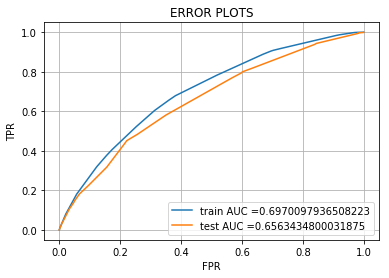

In [155]:
clf.fit(x2_train, y2_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = predict_prob(clf, x2_train.tocsc())    
y_test_pred = predict_prob(clf, x2_test.tocsc())

train_fpr, train_tpr, tr_thresholds = roc_curve(y2_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y2_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

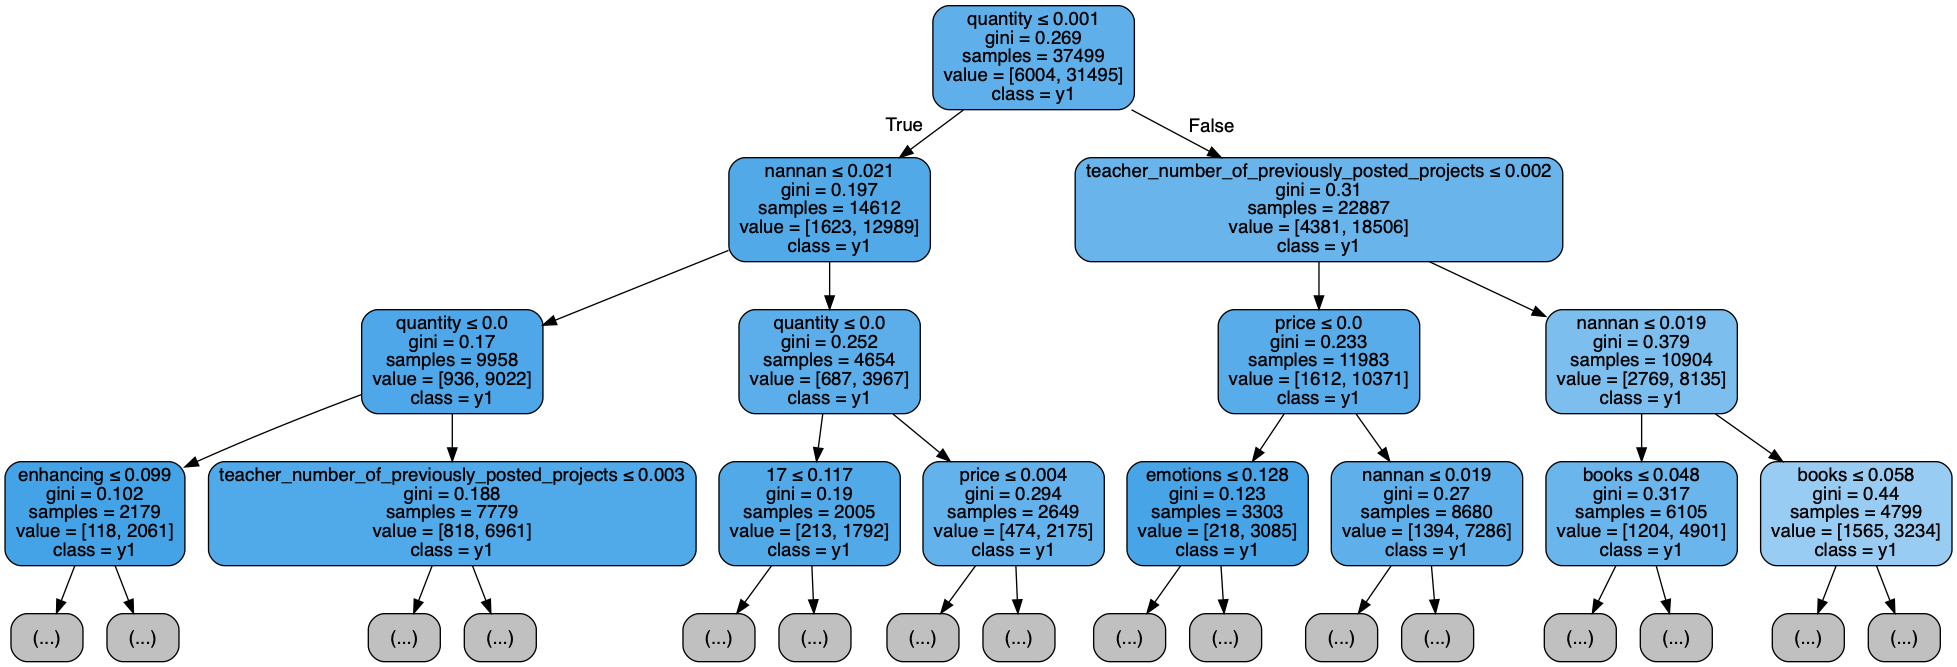

In [156]:
#visualising dt
#CITATION: https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  max_depth =3,
                class_names = True,
                feature_names = feature_list_tfidf,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [157]:
pvt = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_min_samples_split', columns='param_max_depth')

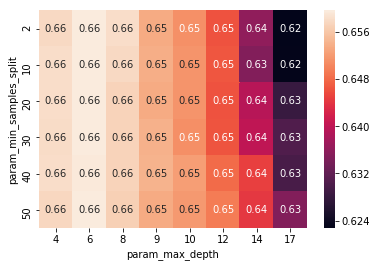

In [158]:
import seaborn as sns       
ax = sns.heatmap(pvt, annot= True )

In [159]:
#the parameters we chose from grid search and the results....
#from the above heatmap give us the same parameters
#max_depth=6
#min_samples_split=2

In [160]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.42013902146412635 for threshold 0.854


Train confusion matrix


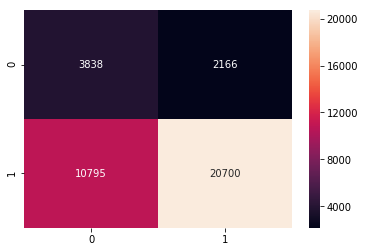

In [161]:
print("Train confusion matrix")
conf_matrix_train = confusion_matrix(y2_train, predict_with_best_t(y_train_pred, best_t))
#plotting confusion matrix using seaborn
sns.heatmap(conf_matrix_train,fmt = 'd', annot=True)

Test confusion matrix


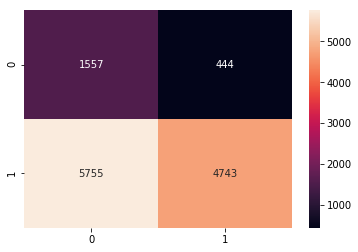

In [162]:
print("Test confusion matrix")
conf_matrix_test = confusion_matrix(y2_test, predict_with_best_t(y_test_pred, best_t))

sns.heatmap(conf_matrix_test,fmt = 'd', annot=True)

In [163]:
####words cloud
conf_matrix_test[0][1]

444

In [164]:
x_ = x_test['clean_essay']
x_ = x_[:12499]
x_.shape

(12499,)

In [165]:
y2_test.shape

(12499,)

In [166]:
y2_pred = predict_with_best_t(y_test_pred, best_t) #list

In [167]:
#converting to array
y2_pred = np.array(y2_pred)
y2_pred.shape

(12499,)

In [168]:
df= pd.DataFrame(x_)
df['y_original']= y2_test #adding original y values
df['y_pred'] = y2_pred #adding predicted y values

print(df.shape)
df.head(2)

(12499, 3)


clean_essay  y_original  y_pred
2243   teach class 24 kindergarten students title 1 s...           1       1
26478  fourth grade students enter classroom knowing ...           1       0

In [169]:
false_positive_datapts = df[(df['y_original']==0) & (df['y_pred'] == 1)]
false_positive_datapts.head(2)

print(false_positive_datapts.shape)

(444, 3)


In [170]:
fp_data = "".join(essay for essay in df.clean_essay)

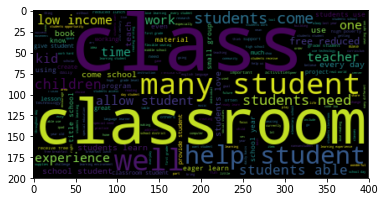

In [171]:
from wordcloud import WordCloud

w_cld = WordCloud().generate(fp_data)

plt.imshow(w_cld, interpolation = 'bilinear')
plt.show()

In [172]:
###boxplot
#x_price = x_test['price']
indices = []
for row in false_positive_datapts.index:
    indices.append(row)
#print(indices)
print(len(indices))
#indices ---- stores the indices of the points for which we have false positive

444


In [173]:
row_price = x_test.loc[indices]['price'] #extracting all the prices of the rows which gave false positive

Text(0.5, 1.0, 'box plot for price of false positive data points')

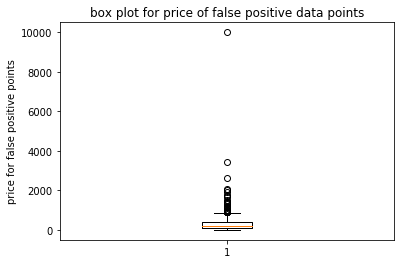

In [174]:
from matplotlib.pyplot import boxplot

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(row_price)
plt.ylabel("price for false positive points")
plt.title("box plot for price of false positive data points")

In [175]:
row_previous_project = x_test.loc[indices]['teacher_number_of_previously_posted_projects']
row_previous_project.head(2)

7760    4
2741    0
Name: teacher_number_of_previously_posted_projects, dtype: int64

Text(0.5, 1.0, 'box plot for teacher_number_of_previously_posted_projects of false positive data points')

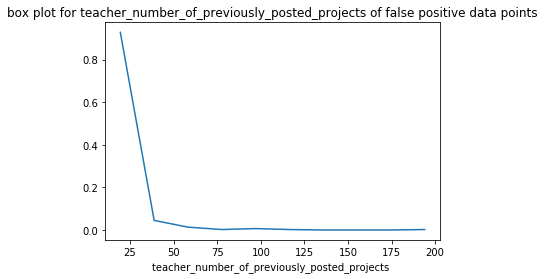

In [176]:
counts, bin_edges = np.histogram(row_previous_project)

pdf= counts/ sum(counts)
plt.plot(bin_edges[1:], pdf)
plt.xlabel("teacher_number_of_previously_posted_projects ")
plt.title("pdf plot for teacher_number_of_previously_posted_projects of false positive data points")

### 2.4.3 Applying DT brute force on AVG W2V,<font color='red'> SET 3</font>

In [177]:
x3_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_one_hot_train,teacher_prefix_one_hot_train,grade_one_hot_train,price_standardized_train,teacher_number_of_previously_posted_projects_standardized_train,quantity_train,neg_train, pos_train,  neu_train, compound_train,essay_words_train,title_words_train , avg_w2v_vectors_essay_train,avg_w2v_vectors_title_train)) 
y3_train = y_train[:37499]

x3_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_one_hot_test,teacher_prefix_one_hot_test,grade_one_hot_test,price_standardized_test,teacher_number_of_previously_posted_projects_standardized_test,quantity_test,neg_test, pos_test,  neu_test, compound_test,essay_words_test,title_words_test,avg_w2v_vectors_essay_test,avg_w2v_vectors_title_test)) 
y3_test = y_test[:12499]

In [178]:
print(x3_train.shape)
print(y3_train.shape)

print(x3_test.shape)
print(y3_test.shape)

(37499, 708)
(37499,)
(12499, 708)
(12499,)


In [179]:
depth = [4,6, 8, 9,10,12,14,17]
min_sample_split = [2,10,20,30,40,50]
parameters = {'max_depth':[4,6, 8, 9,10,12,14,17] , 'min_samples_split': [2,10,20,30,40,50] }
neigh = tree.DecisionTreeClassifier()

model = GridSearchCV(neigh, parameters,scoring='roc_auc') 
model.fit(x3_train,y3_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 9, 10, 12, 14, 17],
                         'min_samples_split': [2, 10, 20, 30, 4

In [180]:
clf = model.best_estimator_
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [181]:
#best hyperparamters- 
#max_depth=6
#min_samples_split= 2

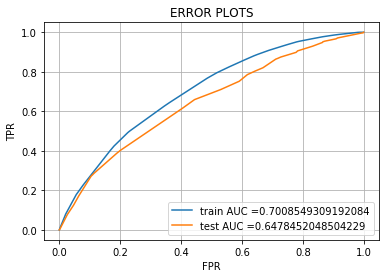

In [182]:
clf.fit(x3_train, y3_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = predict_prob(clf, x3_train.tocsc())    
y_test_pred = predict_prob(clf, x3_test.tocsc())

train_fpr, train_tpr, tr_thresholds = roc_curve(y3_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y3_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [183]:
pvt = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_min_samples_split', columns='param_max_depth')

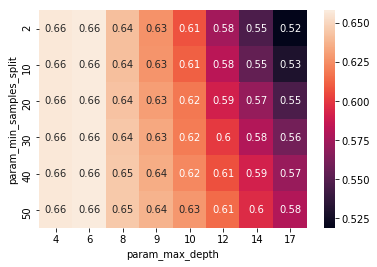

In [184]:
import seaborn as sns       
ax = sns.heatmap(pvt, annot= True )

In [185]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.4109468641268841 for threshold 0.846


Train confusion matrix


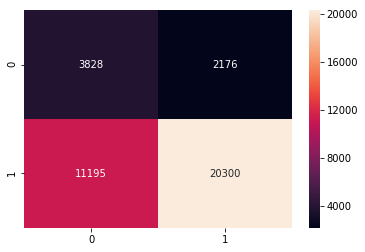

In [186]:
print("Train confusion matrix")
conf_matrix_train = confusion_matrix(y3_train, predict_with_best_t(y_train_pred, best_t))
#plotting confusion matrix using seaborn
sns.heatmap(conf_matrix_train,fmt = 'd', annot=True)

Test confusion matrix


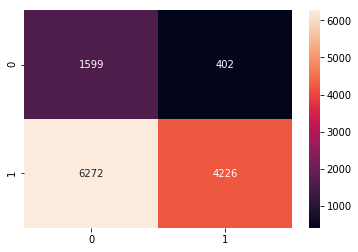

In [187]:
print("Test confusion matrix")
conf_matrix_test = confusion_matrix(y3_test, predict_with_best_t(y_test_pred, best_t))

sns.heatmap(conf_matrix_test,fmt = 'd', annot=True)

In [188]:
####words cloud

conf_matrix_test[0][1]

402

In [189]:
x_ = x_test['clean_essay']
x_ = x_[:12499]
x_.shape

(12499,)

In [190]:
y3_test.shape

(12499,)

In [191]:
y3_pred = predict_with_best_t(y_test_pred, best_t) #list

#converting to array
y3_pred = np.array(y3_pred)
y3_pred.shape

(12499,)

In [192]:
df= pd.DataFrame(x_)
df['y_original']= y3_test #adding original y values
df['y_pred'] = y3_pred #adding predicted y values

print(df.shape)
df.head(2)

(12499, 3)


clean_essay  y_original  y_pred
2243   teach class 24 kindergarten students title 1 s...           1       1
26478  fourth grade students enter classroom knowing ...           1       0

In [193]:
false_positive_datapts = df[(df['y_original']==0) & (df['y_pred'] == 1)]
false_positive_datapts.head(2)

clean_essay  y_original  y_pred
7760   second graders excited come school learn every...           0       1
45566  school library center school students enjoy vi...           0       1

In [194]:
false_positive_datapts.shape

(402, 3)

In [195]:
fp_data = "".join(essay for essay in df.clean_essay)

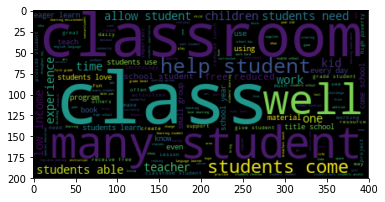

In [196]:
from wordcloud import WordCloud

w_cld = WordCloud().generate(fp_data)

plt.imshow(w_cld, interpolation = 'bilinear')
plt.show()

In [197]:
###boxplot
#x_price = x_test['price']
indices = []
for row in false_positive_datapts.index:
    indices.append(row)
#print(indices)
print(len(indices))
#indices ---- stores the indices of the points for which we have false positive

402


In [198]:
row_price = x_test.loc[indices]['price'] #extracting all the prices of the rows which gave false positive

Text(0.5, 1.0, ' boxplot for price for all false positive points')

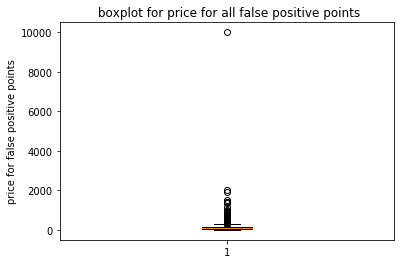

In [199]:
from matplotlib.pyplot import boxplot

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(row_price)
plt.ylabel("price for false positive points")
plt.title(" boxplot for price for all false positive points")

In [200]:
row_previous_project = x_test.loc[indices]['teacher_number_of_previously_posted_projects']
row_previous_project.head(2)

7760     4
45566    3
Name: teacher_number_of_previously_posted_projects, dtype: int64

Text(0.5, 1.0, ' boxplot for teacher_number_of_previously_posted_projects for all false positive points')

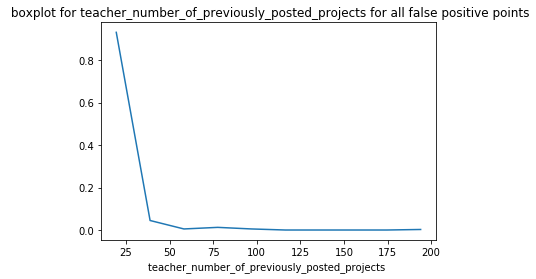

In [201]:
counts, bin_edges = np.histogram(row_previous_project)

pdf= counts/ sum(counts)
plt.plot(bin_edges[1:], pdf)
plt.xlabel("teacher_number_of_previously_posted_projects ")
plt.title(" pdf for teacher_number_of_previously_posted_projects for all false positive points")

### 2.4.4 Applying DT brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [202]:
x4_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_one_hot_train,teacher_prefix_one_hot_train,grade_one_hot_train,price_standardized_train,teacher_number_of_previously_posted_projects_standardized_train,quantity_train,neg_train, pos_train,  neu_train, compound_train,essay_words_train,title_words_train , tfidf_w2v_vectors_title_train ,tfidf_w2v_vectors_essay_train)) 
y4_train = y_train[:37499]

x4_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_one_hot_test,teacher_prefix_one_hot_test,grade_one_hot_test,price_standardized_test,teacher_number_of_previously_posted_projects_standardized_test,quantity_test,neg_test, pos_test,  neu_test, compound_test,essay_words_test,title_words_test,tfidf_w2v_vectors_title_test,tfidf_w2v_vectors_essay_test)) 
y4_test = y_test[:12499]

In [203]:
print(x4_train.shape)
print(y4_train.shape)

print(x4_test.shape)
print(y4_test.shape)

#to proceed with applying knn on bow, we've created the data 

(37499, 708)
(37499,)
(12499, 708)
(12499,)


In [204]:
depth = [4,6, 8, 9,10,12,14,17]
min_sample_split = [2,10,20,30,40,50]
parameters = {'max_depth':[4,6, 8, 9,10,12,14,17] , 'min_samples_split': [2,10,20,30,40,50] }
neigh = tree.DecisionTreeClassifier()

In [205]:
model = GridSearchCV(neigh, parameters,scoring='roc_auc') 
model.fit(x4_train,y4_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 9, 10, 12, 14, 17],
                         'min_samples_split': [2, 10, 20, 30, 4

In [206]:
clf = model.best_estimator_
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [207]:
#best hyperparamters- 
#max_depth=6
#min_samples_split=50

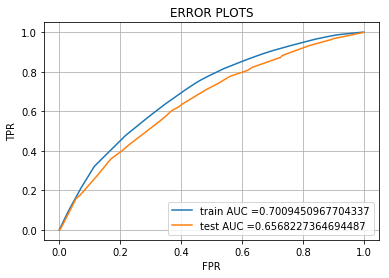

In [208]:
clf.fit(x4_train, y4_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = predict_prob(clf, x4_train.tocsc())    
y_test_pred = predict_prob(clf, x4_test.tocsc())

train_fpr, train_tpr, tr_thresholds = roc_curve(y4_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y4_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [209]:
pvt = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_min_samples_split', columns='param_max_depth')

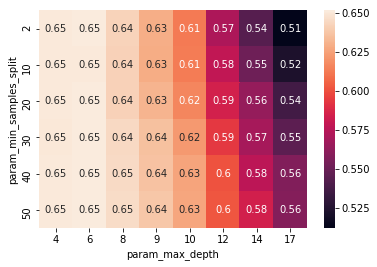

In [210]:
import seaborn as sns       
ax = sns.heatmap(pvt, annot= True )

In [211]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.41516764132161876 for threshold 0.851


Train confusion matrix


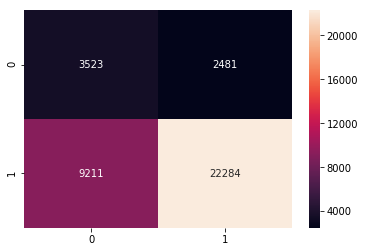

In [212]:
print("Train confusion matrix")
conf_matrix_train = confusion_matrix(y4_train, predict_with_best_t(y_train_pred, best_t))
#plotting confusion matrix using seaborn
sns.heatmap(conf_matrix_train,fmt = 'd', annot=True)

Test confusion matrix


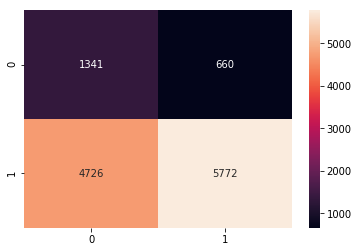

In [213]:
print("Test confusion matrix")
conf_matrix_test = confusion_matrix(y4_test, predict_with_best_t(y_test_pred, best_t))

sns.heatmap(conf_matrix_test,fmt = 'd', annot=True)

In [214]:
####words cloud

conf_matrix_test[0][1]

660

In [215]:
x_ = x_test['clean_essay']
x_ = x_[:12499]
x_.shape

(12499,)

In [216]:
y4_test.shape

(12499,)

In [217]:
y4_pred = predict_with_best_t(y_test_pred, best_t) #list

In [218]:
#converting to array
y4_pred = np.array(y4_pred)
y4_pred.shape

(12499,)

In [219]:
df= pd.DataFrame(x_)
df['y_original']= y4_test #adding original y values
df['y_pred'] = y4_pred #adding predicted y values

In [220]:
print(df.shape)
df.head(2)

(12499, 3)


clean_essay  y_original  y_pred
2243   teach class 24 kindergarten students title 1 s...           1       1
26478  fourth grade students enter classroom knowing ...           1       1

In [221]:
false_positive_datapts = df[(df['y_original']==0) & (df['y_pred'] == 1)]
false_positive_datapts.head(2)

false_positive_datapts.shape

(660, 3)

In [222]:
fp_data = "".join(essay for essay in df.clean_essay)

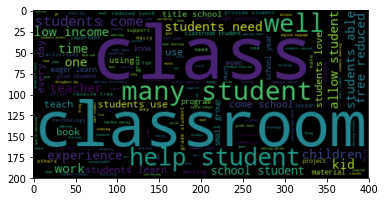

In [223]:
from wordcloud import WordCloud

w_cld = WordCloud().generate(fp_data)

plt.imshow(w_cld, interpolation = 'bilinear')
plt.show()

In [224]:
###boxplot
#x_price = x_test['price']
indices = []
for row in false_positive_datapts.index:
    indices.append(row)
#print(indices)
print(len(indices))
#indices ---- stores the indices of the points for which we have false positive

660


In [225]:
row_price = x_test.loc[indices]['price'] #extracting all the prices of the rows which gave false positive

Text(0.5, 1.0, 'boxplot for price for all false positive points')

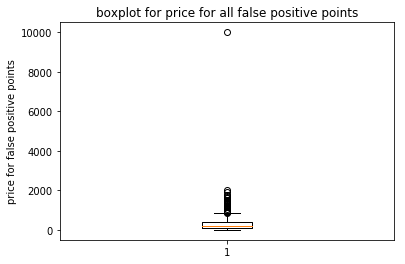

In [226]:
from matplotlib.pyplot import boxplot

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(row_price)
plt.ylabel("price for false positive points")
plt.title("boxplot for price for all false positive points")

In [227]:
row_previous_project = x_test.loc[indices]['teacher_number_of_previously_posted_projects']
row_previous_project.head(2)

23352    57
7760      4
Name: teacher_number_of_previously_posted_projects, dtype: int64

Text(0.5, 1.0, 'pdf for teacher_number_of_previously_posted_projects for all false positive points')

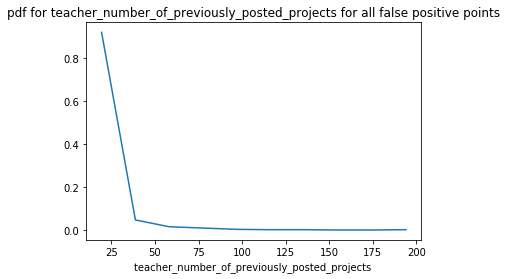

In [228]:
counts, bin_edges = np.histogram(row_previous_project)

pdf= counts/ sum(counts)
plt.plot(bin_edges[1:], pdf)
plt.xlabel("teacher_number_of_previously_posted_projects ")
plt.title("pdf for teacher_number_of_previously_posted_projects for all false positive points")

### 2.4.4 Applying DT brute force ,<font color='red'> SET 5</font>

In [229]:
print(x2_train_top_5000.shape)
print(y2_train.shape)

print(x2_test_top_5000.shape)
print(y2_test.shape)
#to proceed with applying knn on bow, we've created the data 



(37499, 5000)
(37499,)
(12499, 5000)
(12499,)


In [230]:
depth = [4,6, 8, 9,10,12,14,17]
min_sample_split = [2,10,20,30,40,50]
parameters = {'max_depth':[4,6, 8, 9,10,12,14,17] , 'min_samples_split': [2,10,20,30,40,50] }
neigh = tree.DecisionTreeClassifier()

model = GridSearchCV(neigh, parameters,scoring='roc_auc') 
model.fit(x2_train_top_5000,y2_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 9, 10, 12, 14, 17],
                         'min_samples_split': [2, 10, 20, 30, 4

In [231]:
clf = model.best_estimator_
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [232]:
#best hyperparamters- 
#max_depth=6
#min_samples_split=2

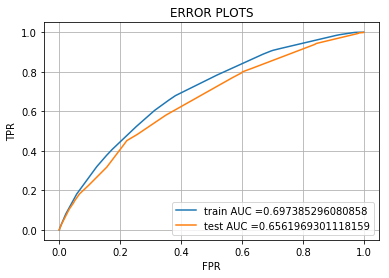

In [233]:
clf.fit(x2_train_top_5000, y2_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = predict_prob(clf, x2_train_top_5000.tocsc())    
y_test_pred = predict_prob(clf, x2_test_top_5000.tocsc())

train_fpr, train_tpr, tr_thresholds = roc_curve(y2_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y2_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

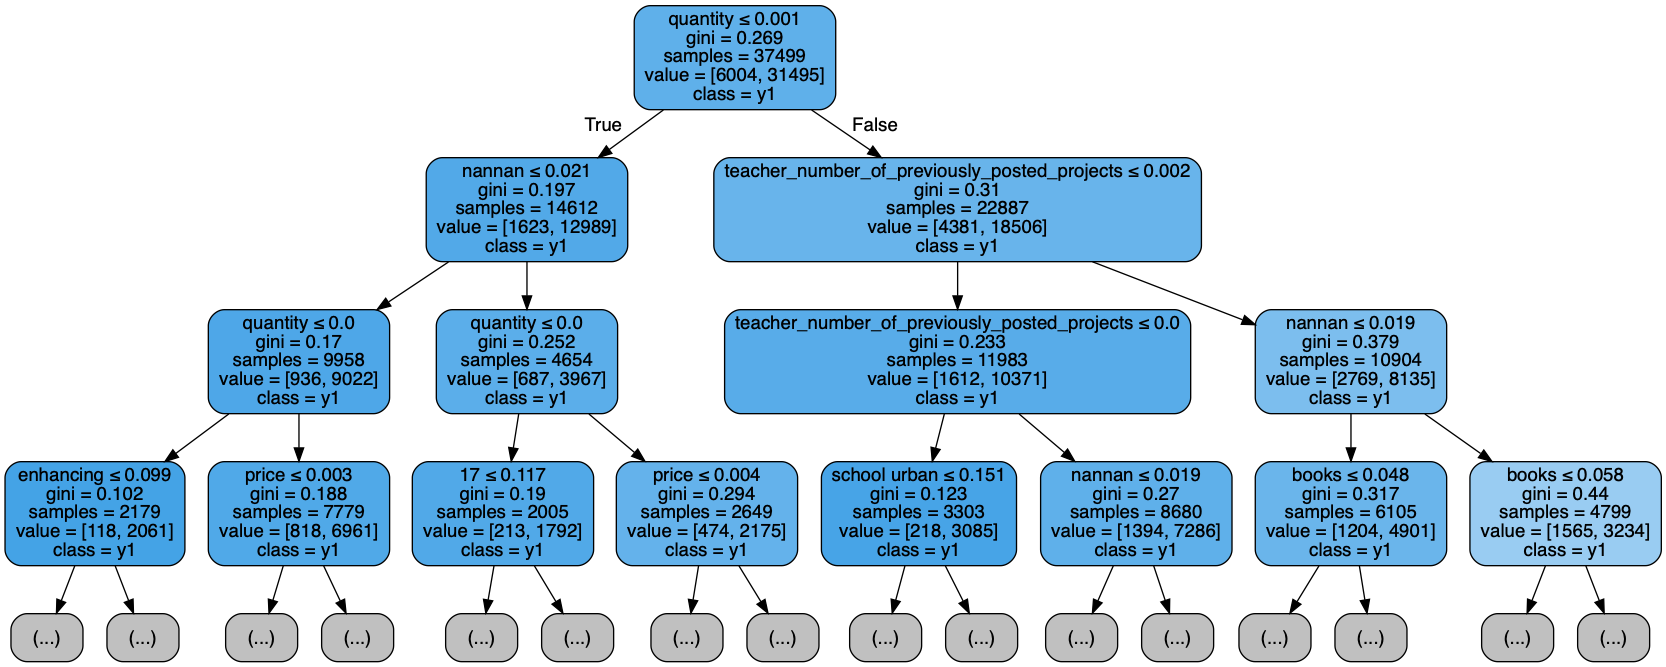

In [234]:
#visualising dt
#CITATION: https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  max_depth =3,
                class_names = True,
                feature_names = top_5000_feature_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [235]:
pvt = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_min_samples_split', columns='param_max_depth')

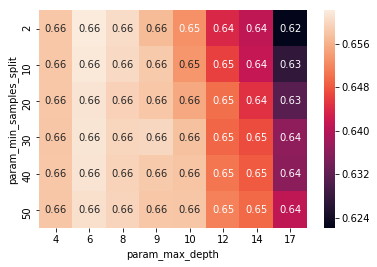

In [236]:
import seaborn as sns       
ax = sns.heatmap(pvt, annot= True )

In [237]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.4203825803171491 for threshold 0.854


Train confusion matrix


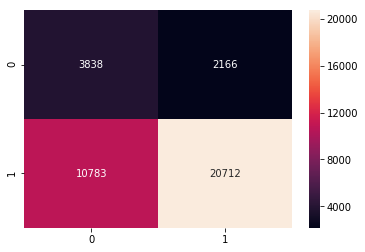

In [238]:
print("Train confusion matrix")
conf_matrix_train = confusion_matrix(y2_train, predict_with_best_t(y_train_pred, best_t))
#plotting confusion matrix using seaborn
sns.heatmap(conf_matrix_train,fmt = 'd', annot=True)

Test confusion matrix


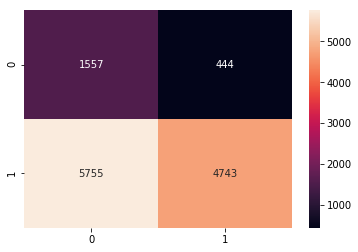

In [239]:
print("Test confusion matrix")
conf_matrix_test = confusion_matrix(y2_test, predict_with_best_t(y_test_pred, best_t))

sns.heatmap(conf_matrix_test,fmt = 'd', annot=True)

In [240]:
####words cloud

conf_matrix_test[0][1]

444

In [241]:
x_ = x_test['clean_essay']
x_ = x_[:12499]
x_.shape

(12499,)

In [242]:
y1_test.shape

(12499,)

In [243]:
y1_pred = predict_with_best_t(y_test_pred, best_t) #list

In [244]:
#converting to array
y1_pred = np.array(y1_pred)
y1_pred.shape

(12499,)

In [245]:
df= pd.DataFrame(x_)
df['y_original']= y1_test #adding original y values
df['y_pred'] = y1_pred #adding predicted y values

print(df.shape)
df.head(2)

(12499, 3)


clean_essay  y_original  y_pred
2243   teach class 24 kindergarten students title 1 s...           1       1
26478  fourth grade students enter classroom knowing ...           1       0

In [246]:
false_positive_datapts = df[(df['y_original']==0) & (df['y_pred'] == 1)]
false_positive_datapts.head(2)

clean_essay  y_original  y_pred
7760  second graders excited come school learn every...           0       1
2741  end school year would like students reading gr...           0       1

In [247]:
false_positive_datapts.shape

(444, 3)

In [248]:
fp_data = "".join(essay for essay in df.clean_essay)

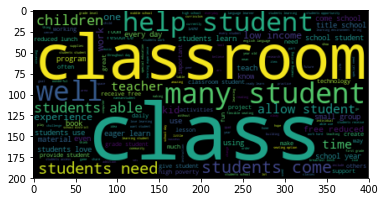

In [249]:
from wordcloud import WordCloud

w_cld = WordCloud().generate(fp_data)

plt.imshow(w_cld, interpolation = 'bilinear')
plt.show()

In [250]:
###boxplot
#x_price = x_test['price']
indices = []
for row in false_positive_datapts.index:
    indices.append(row)
#print(indices)
print(len(indices))
#indices ---- stores the indices of the points for which we have false positive

444


In [251]:
row_price = x_test.loc[indices]['price'] #extracting all the prices of the rows which gave false positive

Text(0.5, 1.0, 'box plot for price of false positive data points')

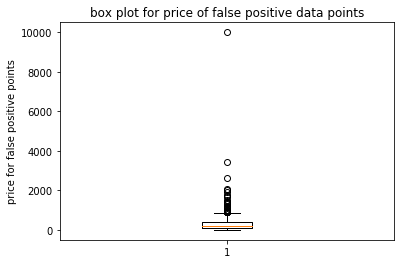

In [252]:
from matplotlib.pyplot import boxplot

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(row_price)
plt.ylabel("price for false positive points")
plt.title("box plot for price of false positive data points")

In [253]:
row_previous_project = x_test.loc[indices]['teacher_number_of_previously_posted_projects']
row_previous_project.head(2)

7760    4
2741    0
Name: teacher_number_of_previously_posted_projects, dtype: int64

Text(0.5, 1.0, 'pdf plot for teacher_number_of_previously_posted_projects of false positive data points')

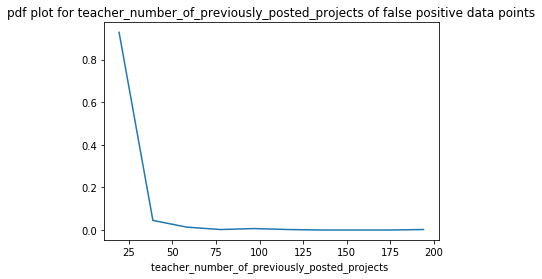

In [254]:
counts, bin_edges = np.histogram(row_previous_project)

pdf= counts/ sum(counts)
plt.plot(bin_edges[1:], pdf)
plt.xlabel("teacher_number_of_previously_posted_projects ")
plt.title("pdf plot for teacher_number_of_previously_posted_projects of false positive data points")

<h1>3. Conclusions</h1>

In [202]:
# Please compare all your models using Prettytable libra
#citation: http://zetcode.com/python/prettytable/

In [255]:
from prettytable import PrettyTable

In [256]:
x = PrettyTable()

In [257]:
x.field_names = ["Vectorizer", "Model", "Hyper Parameter - depth","Hyper Parameter - min_sample_split", "AUC "]

In [258]:
x.add_row(["BOW", 'Brute',8,40, 0.654])
x.add_row(["TFIDF", 'Brute', 6,20 , 0.656])
x.add_row(["W2V", 'Brute', 6,2, 0.647])
x.add_row(["TFIDFW2V", 'Brute', 6,50,0.657])
x.add_row(["TFIDF top 5000", 'Brute',6,2,0.656])


In [259]:
print(x)

+----------------+-------+-------------------------+------------------------------------+-------+
|   Vectorizer   | Model | Hyper Parameter - depth | Hyper Parameter - min_sample_split |  AUC  |
+----------------+-------+-------------------------+------------------------------------+-------+
|      BOW       | Brute |            8            |                 40                 | 0.654 |
|     TFIDF      | Brute |            6            |                 20                 | 0.656 |
|      W2V       | Brute |            6            |                 2                  | 0.647 |
|    TFIDFW2V    | Brute |            6            |                 50                 | 0.657 |
| TFIDF top 5000 | Brute |            6            |                 2                  | 0.656 |
+----------------+-------+-------------------------+------------------------------------+-------+
